## Introduction

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by the coronavirus SARS-CoV-2. The first known case was identified in Wuhan, China, in December 2019.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_csv('covid.csv')

In [3]:
#Having a glance at some of the records

covid

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19493,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19494,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         19432 non-null  object 
 1   location                         19496 non-null  object 
 2   date                             19496 non-null  object 
 3   total_cases                      19496 non-null  int64  
 4   new_cases                        19496 non-null  int64  
 5   total_deaths                     19496 non-null  int64  
 6   new_deaths                       19496 non-null  int64  
 7   total_cases_per_million          19119 non-null  float64
 8   new_cases_per_million            19119 non-null  float64
 9   total_deaths_per_million         19119 non-null  float64
 10  new_deaths_per_million           19119 non-null  float64
 11  total_tests                      5164 non-null   float64
 12  new_tests         

In [5]:
covid.isnull().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [6]:
covid.isnull().sum()/len(covid)*100

iso_code                            0.328272
location                            0.000000
date                                0.000000
total_cases                         0.000000
new_cases                           0.000000
total_deaths                        0.000000
new_deaths                          0.000000
total_cases_per_million             1.933730
new_cases_per_million               1.933730
total_deaths_per_million            1.933730
new_deaths_per_million              1.933730
total_tests                        73.512515
new_tests                          76.446451
total_tests_per_thousand           73.512515
new_tests_per_thousand             76.446451
new_tests_smoothed                 71.122281
new_tests_smoothed_per_thousand    71.122281
tests_units                        68.049856
stringency_index                   23.081658
population                          0.328272
population_density                  4.359869
median_age                          8.940295
aged_65_ol

In [10]:
#Looking at the different locations

covid["location"].value_counts()

location
Sweden            146
Canada            146
United States     146
Lithuania         146
Brazil            146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: count, Length: 212, dtype: int64

In [11]:
#Getting the cases in India

india_case=covid[covid["location"]=="India"] 

In [12]:
india_case

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,IND,India,2020-05-20,106750,5611,3303,140,77.355,4.066,2.393,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,IND,India,2020-05-21,112359,5609,3435,132,81.419,4.064,2.489,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,IND,India,2020-05-22,118447,6088,3583,148,85.831,4.412,2.596,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


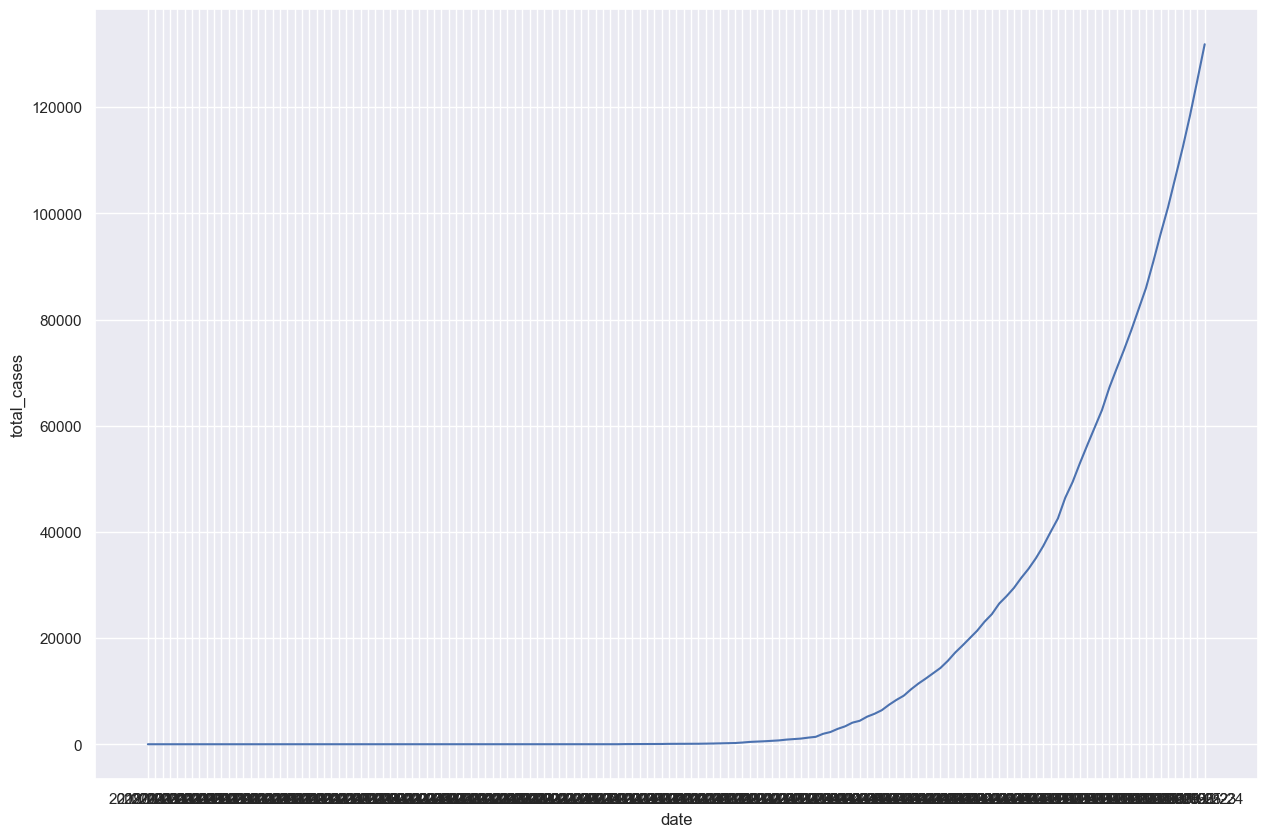

In [13]:
#Total cases per day in India

sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

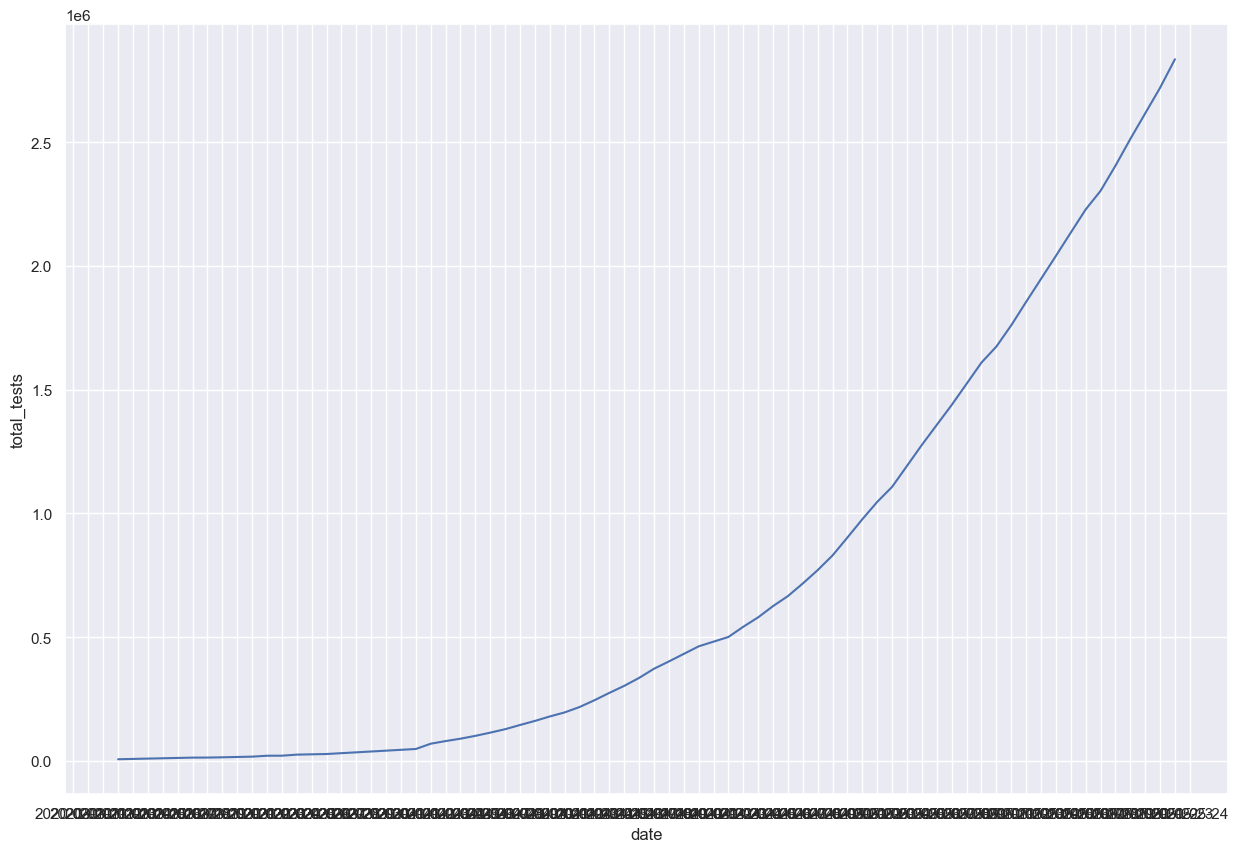

In [14]:
#Total tests per day in India

sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_case)
plt.show()

In [24]:
covid.groupby("location")['total_cases'].max().sort_values(ascending = False)[1:6]

location
United States     1622670
Brazil             347398
Russia             335882
United Kingdom     254195
Spain              235290
Name: total_cases, dtype: int64

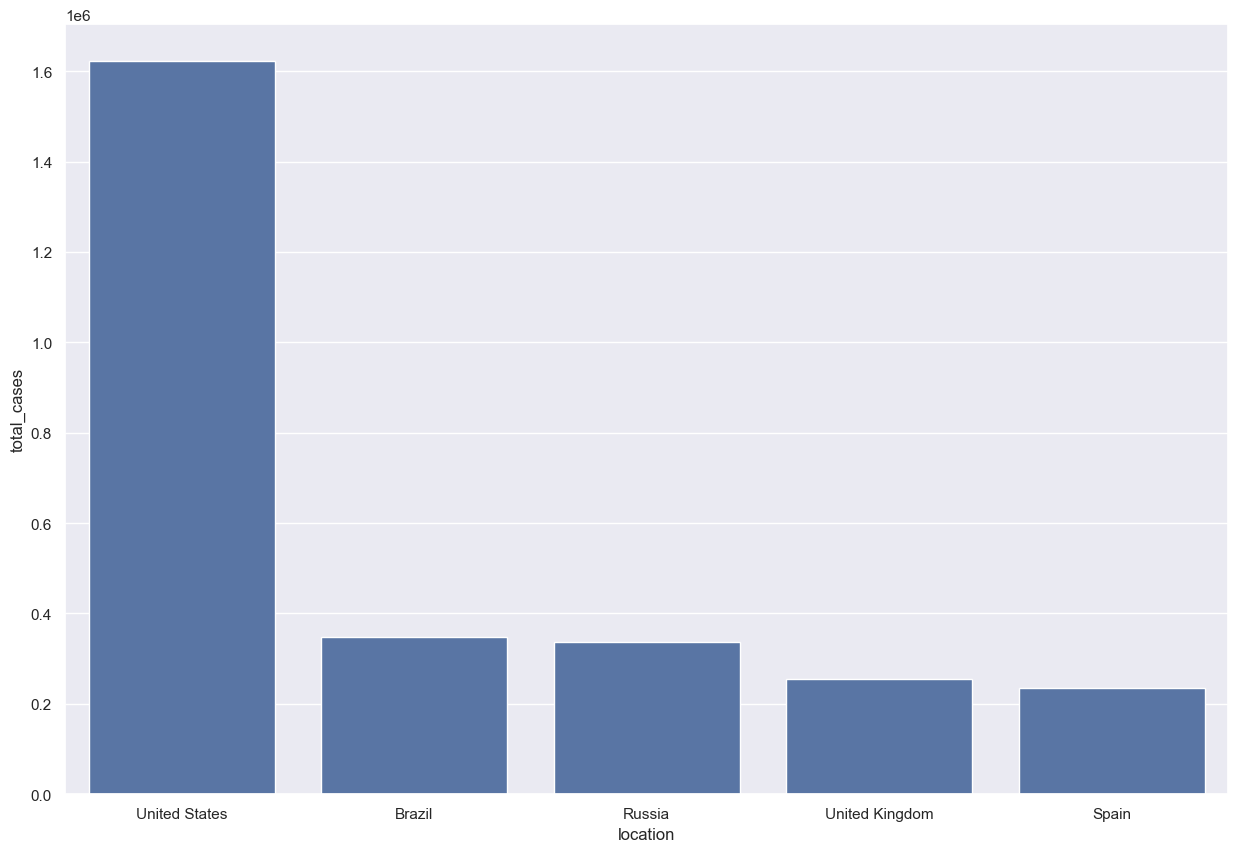

In [25]:
#Making bar-plot for countries with top cases

sns.barplot(covid.groupby("location")['total_cases'].max().sort_values(ascending = False)[1:6])
plt.show()

In [49]:
india_case.isnull().sum()/len(india_case)*100

iso_code                            0.000000
location                            0.000000
date                                0.000000
total_cases                         0.000000
new_cases                           0.000000
total_deaths                        0.000000
new_deaths                          0.000000
total_cases_per_million             0.000000
new_cases_per_million               0.000000
total_deaths_per_million            0.000000
new_deaths_per_million              0.000000
total_tests                        58.620690
new_tests                          62.758621
total_tests_per_thousand           58.620690
new_tests_per_thousand             62.758621
new_tests_smoothed                 55.172414
new_tests_smoothed_per_thousand    55.172414
tests_units                        50.344828
stringency_index                    0.689655
population                          0.000000
population_density                  0.000000
median_age                          0.000000
aged_65_ol

In [50]:
# dropping columns with null values greater 50%

for i in india_case.columns:
    if india_case[i].isnull().sum()/len(india_case)*100 > 50:
        india_case.drop(columns = i, inplace= True)

In [54]:
india_case.isnull().sum()

iso_code                    0
location                    0
date                        0
total_cases                 0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
new_cases_per_million       0
total_deaths_per_million    0
new_deaths_per_million      0
stringency_index            1
population                  0
population_density          0
median_age                  0
aged_65_older               0
aged_70_older               0
gdp_per_capita              0
extreme_poverty             0
cvd_death_rate              0
diabetes_prevalence         0
female_smokers              0
male_smokers                0
handwashing_facilities      0
hospital_beds_per_100k      0
dtype: int64

In [55]:
india_case.dropna(inplace= True)

In [65]:
india_case.describe().T

,count,mean,std,min,25%,50%,75%,max
date,144.0,7.374970e+05,4.214725e+01,7.374250e+05,7.374608e+05,7.374975e+05,7.375332e+05,7.375690e+05
total_cases,144.0,1.559600e+04,3.033816e+04,0.000000e+00,3.000000e+00,7.900000e+01,1.471150e+04,1.318680e+05
new_cases,144.0,9.157500e+02,1.604760e+03,0.000000e+00,0.000000e+00,9.000000e+00,1.241750e+03,6.767000e+03
total_deaths,144.0,4.940208e+02,9.500131e+02,0.000000e+00,0.000000e+00,1.500000e+00,4.867500e+02,3.867000e+03
new_deaths,144.0,2.685417e+01,4.495296e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.725000e+01,1.950000e+02
total_cases_per_million,144.0,1.130135e+01,2.198412e+01,0.000000e+00,2.000000e-03,5.700000e-02,1.066050e+01,9.555600e+01
new_cases_per_million,144.0,6.636042e-01,1.162908e+00,0.000000e+00,0.000000e+00,6.500000e-03,9.002500e-01,4.904000e+00
total_deaths_per_million,144.0,3.579861e-01,6.884258e-01,0.000000e+00,0.000000e+00,1.000000e-03,3.527500e-01,2.802000e+00
new_deaths_per_million,144.0,1.945833e-02,3.255504e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.725000e-02,1.410000e-01
stringency_index,144.0,4.886049e+01,4.079293e+01,0.000000e+00,1.257000e+01,3.479000e+01,9.735000e+01,1.000000e+02


In [61]:
india_case.select_dtypes(include= 'number').std()

date                        4.214725e+01
total_cases                 3.033816e+04
new_cases                   1.604760e+03
total_deaths                9.500131e+02
new_deaths                  4.495296e+01
total_cases_per_million     2.198412e+01
new_cases_per_million       1.162908e+00
total_deaths_per_million    6.884258e-01
new_deaths_per_million      3.255504e-02
stringency_index            4.079293e+01
population                  0.000000e+00
population_density          1.254920e-12
median_age                  7.486740e-14
aged_65_older               7.130228e-15
aged_70_older               9.358425e-15
gdp_per_capita              0.000000e+00
extreme_poverty             3.921626e-14
cvd_death_rate              5.704183e-13
diabetes_prevalence         2.317324e-14
female_smokers              2.228196e-15
male_smokers                5.347671e-14
handwashing_facilities      9.982320e-14
hospital_beds_per_100k      7.798687e-16
dtype: float64

In [67]:
for i in india_case.select_dtypes(include= 'number').columns:
    if india_case[i].std() < 0.005:
        india_case.drop(columns = i, inplace= True)

In [69]:
for i in india_case.select_dtypes(include= 'object'):
    print(india_case[i].value_counts())
    print('----------------------')

iso_code
IND    144
Name: count, dtype: int64
----------------------
location
India    144
Name: count, dtype: int64
----------------------


In [70]:
india_case = india_case.select_dtypes(include= 'number')

In [28]:
#converting string date to date-time

import datetime as dt
india_case['date'] = pd.to_datetime(india_case['date']) 
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [29]:
#converting date-time to ordinal

india_case['date']=india_case['date'].map(dt.datetime.toordinal)
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,737424,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,737425,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,737426,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,737427,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,737428,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [71]:
#getting dependent variable and inpedent variable

x= india_case.drop(columns= 'total_cases')
y= india_case[['total_cases']]

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state= 7)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
y_pred= lr.predict(x_test)

In [76]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.12458580316783503